## **ASSIGNMENT - BOOSTING :**


*Question 1:* What is Boosting in Machine Learning? Explain how it improves weak
learners.
- Boosting is an ensemble technique that trains models sequentially, where each new model focuses more on the errors made by previous weak learners, turning multiple weak models into a strong one.
---
*Question 2:* What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- AdaBoost: Adjusts sample weights, giving more importance to misclassified points.
- Gradient Boosting: Trains models by minimizing a loss function using gradients, making it more flexible and powerful.
---
*Question 3:* How does regularization help in XGBoost?
- Regularization in XGBoost penalizes complex trees, reducing overfitting and improving model generalization on unseen data.
---
*Question 4:* Why is CatBoost considered efficient for handling categorical data?
- CatBoost natively handles categorical features using target-based encoding and ordered boosting, avoiding manual preprocessing and reducing target leakage.
---
*Question 5:* What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting is preferred in credit risk prediction, fraud detection, medical diagnosis, and customer churn prediction, where capturing complex patterns and high accuracy are critical.
---


Question 6: Write a Python program to:
- ● Train an AdaBoost Classifier on the Breast Cancer dataset
- ● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


Question 7: Write a Python program to:
- ● Train a Gradient Boosting Regressor on the California Housing dataset
- ● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.7790280034069652


Question 8: Write a Python program to:
- ● Train an XGBoost Classifier on the Breast Cancer dataset
- ● Tune the learning rate using GridSearchCV
- ● Print the best parameters and accuracy

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=1
)

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'learning_rate': 0.2}
Accuracy: 0.956140350877193


Question 9: Write a Python program to:
- ● Train a CatBoost Classifier
- ● Plot the confusion matrix using seaborn

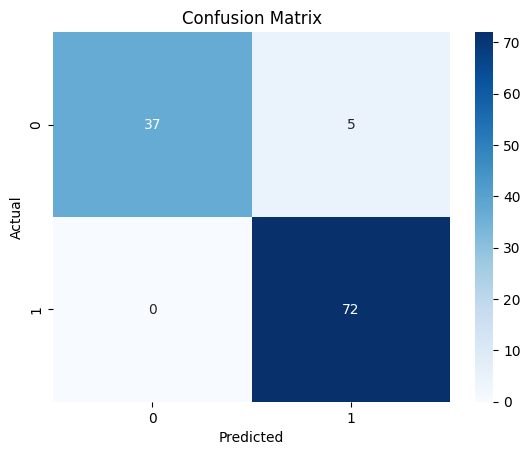

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

model = CatBoostClassifier(verbose=0, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
- ● Data preprocessing & handling missing/categorical values
- ● Choice between AdaBoost, XGBoost, or CatBoost
- ● Hyperparameter tuning strategy
- ● Evaluation metrics you'd choose and why
- ● How the business would benefit from your model

#####ANSWER:
- *Data Preprocessing:* Handle missing values using median/mode or model-based handling; encode categorical features using CatBoost’s native encoding or target encoding; handle imbalance using class weights.
- *Model Choice:* Prefer CatBoost for categorical + missing data, XGBoost for maximum performance; avoid AdaBoost due to noise sensitivity.
- *Hyperparameter Tuning:* Use GridSearchCV/RandomizedSearchCV to tune learning rate, depth, estimators, with early stopping.
- *Evaluation Metrics:* Use ROC-AUC, Recall, and F1-score to handle class imbalance and focus on defaulter detection.
- *Business Benefit:* Reduces loan defaults, improves risk assessment, and increases profitability through better credit decisions.
